In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from rich import print
from dataclasses import dataclass

from walrus_workshop.metrics import compute_energy_flux, compute_energy_spectrum

from script_walrus_errors import WalrusError

In [2]:
# Load the errors
errors = pickle.load(open(Path("errors") / "errors_59.pkl", "rb"))

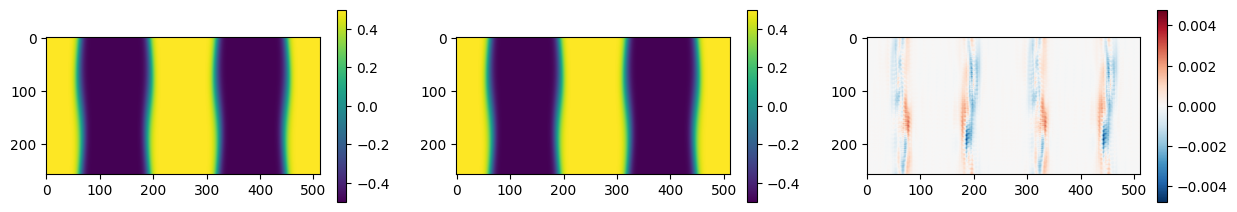

In [3]:
vmin = np.min(errors[0].ref[..., 0])
vmax = np.max(errors[0].ref[..., 0])
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cm = axs[0].imshow(np.squeeze(errors[0].ref[..., 0]), vmin=vmin, vmax=vmax)
fig.colorbar(cm, ax=axs[0], shrink=0.5)
axs[1].imshow(np.squeeze(errors[0].pred[..., 0]), vmin=vmin, vmax=vmax)
fig.colorbar(cm, ax=axs[1], shrink=0.5)
vmax = np.max(np.abs(errors[0].ref[..., 0] - errors[0].pred[..., 0]))
cm = axs[2].imshow(np.squeeze(errors[0].ref[..., 0]) - np.squeeze(errors[0].pred[..., 0]), vmin=-vmax, vmax=vmax, cmap="RdBu_r")
fig.colorbar(cm, ax=axs[2], shrink=0.5)
plt.show()


In [4]:
@dataclass
class EnergySpectrum:
    k: np.ndarray
    E: np.ndarray

def plot_energy_spectrum(error):

    energy_spectrum_ref = EnergySpectrum(*compute_energy_spectrum(np.squeeze(error.ref[..., 1]), np.squeeze(error.ref[..., 2])))
    energy_spectrum_pred = EnergySpectrum(*compute_energy_spectrum(np.squeeze(error.pred[..., 1]), np.squeeze(error.pred[..., 2])))

    fix, axs = plt.subplots(1, 3, figsize=(15, 3))
    ax = axs[0]
    ax.plot(energy_spectrum_ref.k, energy_spectrum_ref.E, 'o', label="Ref")
    ax.plot(energy_spectrum_pred.k, energy_spectrum_pred.E, '.', label="Emulator")
    ax.set_xlabel("Wavenumber")
    ax.set_ylabel("Energy")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.legend()
    ax = axs[1]
    ax.plot(energy_spectrum_ref.k[1:], energy_spectrum_pred.E[1:] / energy_spectrum_ref.E[1:], '-k')
    ax.axhline(1, color='gray', linestyle='--')
    ax.set_xlabel("Wavenumber")
    ax.set_ylabel("Spectral ratio: Emulator / Ref")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax=axs[2]
    bias = np.squeeze(error.pred[..., 0]) - np.squeeze(error.ref[..., 0])
    vmax = np.max(np.abs(bias))
    ax.imshow(bias, cmap="RdBu_r", vmin=-vmax, vmax=vmax)
    fig.tight_layout()
    plt.show()


Time step: 2

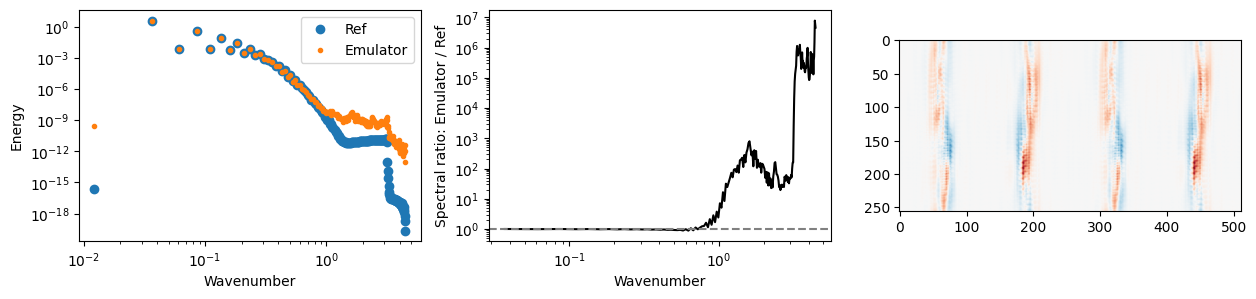

Time step: 4

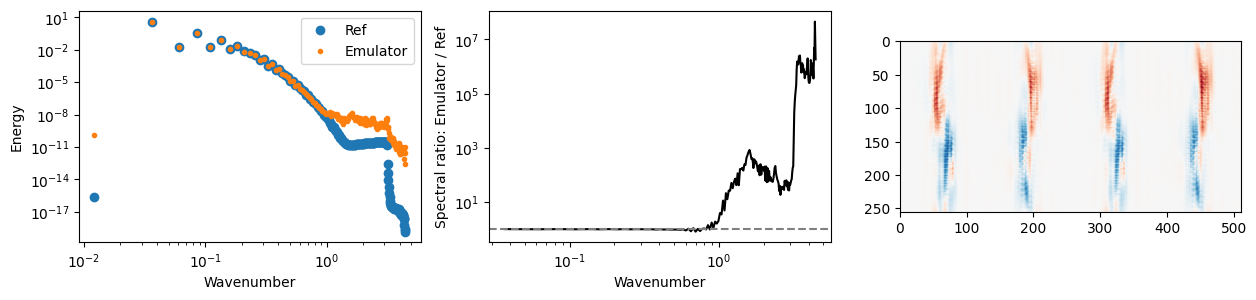

Time step: 8

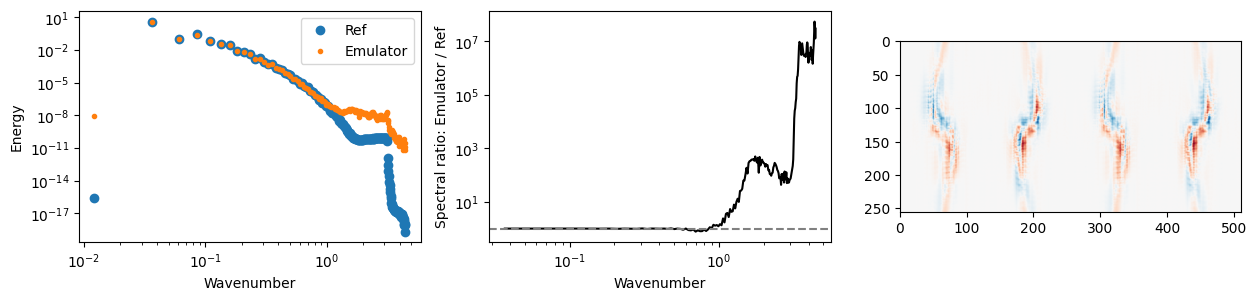

In [7]:
for error in errors[:3]:
    print(f'Time step: {error.step}')
    plot_energy_spectrum(error)


Time step: 98

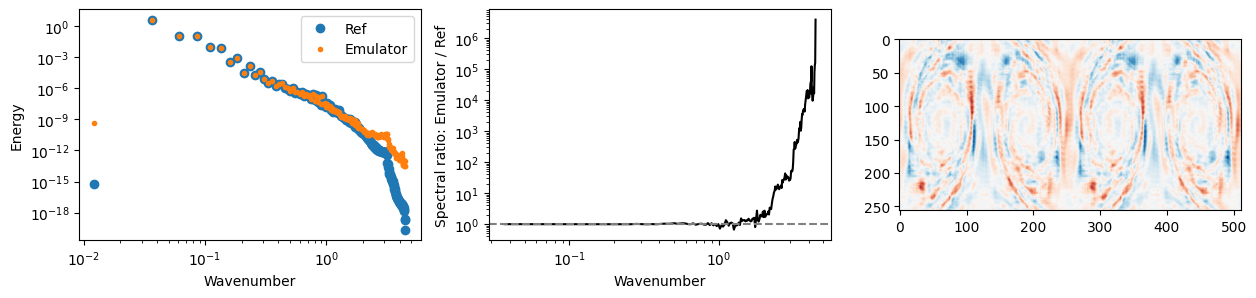

Time step: 99

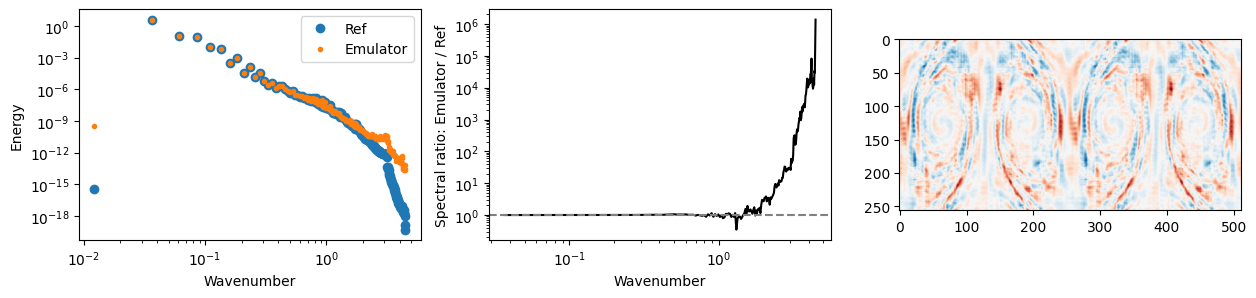

In [6]:
for error in errors[-2:]:
    print(f'Time step: {error.step}')
    plot_energy_spectrum(error)
